# ISYE 6644 Course Project: Blackjack Simulation 
## By Justin Long
### Abstract

In this paper, I examine four different blackjack strategies through the lens of simulation to determine which strategy maximizes profit per hand played.  These strategies range from simple rules on how high I should continue to hit based on what the dealer's up-card is, to slightly more complex strategies using the concept of doubling down on my bets, as well as a strategy including splitting pairs.  Of these, the strategy that maximized profits was ____.

### Background on Blackjack*
##### The Pack
The standard 52-card pack is used, but in most casinos several decks of cards are shuffled together. The six-deck game (312 cards) is the most popular. In addition, the dealer uses a blank plastic card, which is never dealt, but is placed toward the bottom of the pack to indicate when it will be time for the cards to be reshuffled. When four or more decks are used, they are dealt from a shoe (a box that allows the dealer to remove cards one at a time, face down, without actually holding one or more packs). Note: In this simulation, we will use the six-deck game to make the simulation more closely mimic betting in a casino.

##### Objective of the Game
Each participant attempts to beat the dealer by getting a count as close to 21 as possible, without going over 21.

##### Card Values/Scoring
It is up to each individual player if an ace is worth 1 or 11. Face cards are 10 and any other card is its pip value.

##### Betting
Before the deal begins, each player places a bet, in chips, in front of them in the designated area. Minimum and maximum limits are established on the betting, and the general limits are from \\$2 to $500. If you lose, the dealer gets your bet. If you win, you get your original bet back, plus the dealer gives you the same amount as your bet. If you draw (or tie) you keep your bet money. Lastly, if you get blackjack, you get your original bet back, plus 1.5 times your bet from the dealer.

##### The Shuffle and Cut
The dealer thoroughly shuffles portions of the pack until all the cards have been mixed and combined. The dealer designates one of the players to cut, and the plastic insert card is placed so that the last 60 to 75 cards or so will not be used. (Not dealing to the bottom of all the cards makes it more difficult for professional card counters to operate effectively.)

##### The Deal
When all the players have placed their bets, the dealer gives one card face up to each player in rotation clockwise, and then one card face up to themselves. Another round of cards is then dealt face up to each player, but the dealer takes the second card face down. Thus, each player except the dealer receives two cards face up, and the dealer receives one card face up and one card face down. (In some games, played with only one deck, the players' cards are dealt face down and they get to hold them. Today, however, virtually all Blackjack games feature the players' cards dealt face up on the condition that no player may touch any cards.)

##### Naturals
If a player's first two cards are an ace and a "ten-card" (a picture card or 10), giving a count of 21 in two cards, this is a natural or "blackjack." If any player has a natural and the dealer does not, the dealer immediately pays that player one and a half times the amount of their bet. If the dealer has a natural, they immediately collect the bets of all players who do not have naturals, (but no additional amount). If the dealer and another player both have naturals, the bet of that player is a stand-off (a tie), and the player takes back his chips.

If the dealer's face-up card is a ten-card or an ace, they look at their face-down card to see if the two cards make a natural. If the face-up card is not a ten-card or an ace, they do not look at the face-down card until it is the dealer's turn to play.

##### The Play
The player to the left goes first and must decide whether to "stand" (not ask for another card) or "hit" (ask for another card in an attempt to get closer to a count of 21, or even hit 21 exactly). Thus, a player may stand on the two cards originally dealt to them, or they may ask the dealer for additional cards, one at a time, until deciding to stand on the total (if it is 21 or under), or goes "bust" (if it is over 21). In the latter case, the player loses and the dealer collects the bet wagered. The dealer then turns to the next player to their left and serves them in the same manner.

The combination of an ace with a card other than a ten-card is known as a "soft hand," because the player can count the ace as a 1 or 11, and either draw cards or not. For example with a "soft 17" (an ace and a 6), the total is 7 or 17. While a count of 17 is a good hand, the player may wish to draw for a higher total. If the draw creates a bust hand by counting the ace as an 11, the player simply counts the ace as a 1 and continues playing by standing or "hitting" (asking the dealer for additional cards, one at a time).

##### The Dealer's Play
When the dealer has served every player, the dealers face-down card is turned up. If the total is 17 or more, it must stand. If the total is 16 or under, they must take a card. The dealer must continue to take cards until the total is 17 or more, at which point the dealer must stand. If the dealer has an ace, and counting it as 11 would bring the total to 17 or more (but not over 21), the dealer must count the ace as 11 and stand. The dealer's decisions, then, are automatic on all plays, whereas the player always has the option of taking one or more cards.

##### Splitting Pairs
If a player's first two cards are of the same denomination, such as two jacks or two sixes, they may choose to treat them as two separate hands when their turn comes around. The amount of the original bet then goes on one of the cards, and an equal amount must be placed as a bet on the other card. The player first plays the hand to their left by standing or hitting one or more times; only then is the hand to the right played. The two hands are thus treated separately, and the dealer settles with each on its own merits. With a pair of aces, the player is given one card for each ace and may not draw again. Also, if a ten-card is dealt to one of these aces, the payoff is equal to the bet (not one and one-half to one, as with a blackjack at any other time).

##### Doubling Down
Another option open to the player is doubling their bet when the original two cards dealt total 9, 10, or 11. When the player's turn comes, they place a bet equal to the original bet, and the dealer gives the player just one card, which is placed face down and is not turned up until the bets are settled at the end of the hand. With two fives, the player may split a pair, double down, or just play the hand in the regular way. Note that the dealer does not have the option of splitting or doubling down.

##### Insurance
When the dealer's face-up card is an ace, any of the players may make a side bet of up to half the original bet that the dealer's face-down card is a ten-card, and thus a blackjack for the house. Once all such side bets are placed, the dealer looks at the hole card. If it is a ten-card, it is turned up, and those players who have made the insurance bet win and are paid double the amount of their half-bet - a 2 to 1 payoff. When a blackjack occurs for the dealer, of course, the hand is over, and the players' main bets are collected - unless a player also has blackjack, in which case it is a stand-off. Insurance is invariably not a good proposition for the player, unless they are quite sure that there are an unusually high number of ten-cards still left undealt.

##### Settlement
A bet once paid and collected is never returned. Thus, one key advantage to the dealer is that the player goes first. If the player goes bust, they have already lost their wager, even if the dealer goes bust as well. If the dealer goes over 21, the dealer pays each player who has stood the amount of that player's bet. If the dealer stands at 21 or less, the dealer pays the bet of any player having a higher total (not exceeding 21) and collects the bet of any player having a lower total. If there is a stand-off (a player having the same total as the dealer), no chips are paid out or collected.

##### Reshuffling
When each player's bet is settled, the dealer gathers in that player's cards and places them face up at the side against a clear plastic L-shaped shield. The dealer continues to deal from the shoe until coming to the plastic insert card, which indicates that it is time to reshuffle. Once that round of play is over, the dealer shuffles all the cards, prepares them for the cut, places the cards in the shoe, and the game continues.

##### Basic Strategy
Winning tactics in Blackjack require that the player play each hand in the optimum way, and such strategy always takes into account what the dealer's upcard is. When the dealer's upcard is a good one, a 7, 8, 9, 10-card, or ace for example, the player should not stop drawing until a total of 17 or more is reached. When the dealer's upcard is a poor one, 4, 5, or 6, the player should stop drawing as soon as he gets a total of 12 or higher. The strategy here is never to take a card if there is any chance of going bust. The desire with this poor holding is to let the dealer hit and hopefully go over 21. Finally, when the dealer's up card is a fair one, 2 or 3, the player should stop with a total of 13 or higher.

With a soft hand, the general strategy is to keep hitting until a total of at least 18 is reached. Thus, with an ace and a six (7 or 17), the player would not stop at 17, but would hit.

The basic strategy for doubling down is as follows: With a total of 11, the player should always double down. With a total of 10, he should double down unless the dealer shows a ten-card or an ace. With a total of 9, the player should double down only if the dealer's card is fair or poor (2 through 6).

For splitting, the player should always split a pair of aces or 8s; identical ten-cards should not be split, and neither should a pair of 5s, since two 5s are a total of 10, which can be used more effectively in doubling down. A pair of 4s should not be split either, as a total of 8 is a good number to draw to. Generally, 2s, 3s, or 7s can be split unless the dealer has an 8, 9, ten-card, or ace. Finally, 6s should not be split unless the dealer's card is poor (2 through 6).

\*Rules from https://bicyclecards.com/how-to-play/blackjack/ and betting from https://www.businessinsider.com/blackjack-basics-2014-6

### Strategy Comparisons
In this project, I will simulate several strategies outlined below to see if certain strategies could potentially return higher profits.  The three strategies I will employ are:
* Strategy 1 (most basic):
    * If we have a soft hand (ace being used as an 11), keep hitting until we have at least 18
    * If the dealer's upcard is 7-10, keep hitting until we have at least 17
    * If the dealer's upcard is 4-6, keep hitting until we have at least 12
    * If the dealer's upcard is 2 or 3, keep hitting until we have at least 13
* Strategy 2 (double down):
    * Same as strategy 1, except...
    * If we are dealt a hand totaling 11, double down
    * If we are dealt a hand totaling 10 and dealer's upcard is a 2-9, double down
    * If we are dealt a hand totaling 9 and dealer's upcard is a 2-6, double down
* Strategy 3

### Define Helper Functions

In [130]:
# import libraries
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create function to create, shuffle, and cut deck
def generate_deck():
    """
    Generates 6 decks of cards, shuffles cards, and drop uniform random number of cards between 60-75.
    """

    # initialize empty deck
    deck = []

    # append numbered cards 24 times (6 decks & 4 suits)
    for i in range(2,11):
        for j in range(24):
            deck.append(i)

    # append jacks, queens, and kings 24 times (6 decks & 4 suits)
    # represent face cards as 10's
    for i in range(3):
        for j in range(24):
            deck.append(10)

    # append ace's 24 times (6 decks & 4 suits)
    # represent ace cards as 11's
    for i in range(24):
        deck.append(11)

    # shuffle cards
    random.shuffle(deck)

    # insert cut and drop last 60-75 cards
    deck = deck[:len(deck)-random.randint(60,75)]
    return deck

def check_deck(deck, print_logical=False):
    """
    Check if length of deck is zero, and if so, generate new deck.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- shuffled decks of cards
    """
    if len(deck) == 0:
        if print_logical == True:
            print('Generated new decks and shuffled cards')
        deck = generate_deck()
    return deck

    
def check_aces(hand, print_logical=False):
    """
    Checks if sum of cards in hand is over 21 and if ace is being used as an 11.
    If so, use ace as a 1 instead.
    
    Parameters:
        hand (list)          -- cards currently in player's or dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        hand (list) -- cards in player's or dealer's hand, modified for any ace changes
    """
    if sum(hand) > 21 and 11 in hand:
        hand.remove(11)
        hand.append(1)
        if print_logical == True:
            print('Using ace as a one instead')
            print('Hand:', hand)        
    return hand

def hit(deck, hand, print_logical=False):
    """
    Draws one card from top of deck and places that card in either the player's or dealer's hand.
    
    Parameters:
        deck (list)          -- decks of cards 
        hand (list)          -- cards currently in player's or dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        hand (list)          -- cards currently in player's or dealer's hand, modified for any cards drawn
    """
    if print_logical == True:
        print('Hit!')
    deck = check_deck(deck, print_logical)
    hand.append(deck.pop(0))
    hand = check_aces(hand, print_logical)
    return deck, hand

# define graphing function
def graph_outcome(games_list, winnings_list, plot_title):
    # create pandas dataframe of games and winnings
    dfStrategy = pd.DataFrame({"games": games_list,
                              "winnings": winnings_list})
    
    # create average winnings
    dfStrategy['avg_winnings'] = dfStrategy['winnings']/dfStrategy['games']
    
    # graph average winnings
    games = np.array(dfStrategy['games'])
    avg_winnings = np.array(dfStrategy['avg_winnings'])
    final_avg = 'Final Avg:' + '\n' + '$' + str(dfStrategy['avg_winnings'].iloc[-1])
    
    plt.style.use('seaborn-whitegrid')

    fig, ax = plt.subplots()

    ax.axhline(0, color = '#e63946', alpha = 0.9, linestyle = '--', linewidth = 2)
    ax.plot(games, avg_winnings, color = '#457b9d', alpha = 0.9, linewidth = 2)
    ax.annotate(final_avg, xy=(len(games_list),dfStrategy['avg_winnings'].iloc[-1]), 
                xytext=(len(games_list)*0.8, dfStrategy['avg_winnings'].iloc[0]*0.5), 
                horizontalalignment='center',arrowprops = dict(facecolor = 'black', shrink=0.05))

    ax.set_title(plot_title)
    ax.set_xlabel('Number of Games Played')
    ax.set_ylabel('Average Winnings per Hand')
    
    plt.tight_layout()

    plt.show()

### Strategy 1

Below, I have defined a function that plays a hand of blackjack based on the logic laid out previously for strategy 1.

In [131]:
def play_strategy_1(deck, winnings, games, print_logical=False):
    """
    Play hand of blackjack, no doubling down or splitting hands.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
    """
    # initialize hands
    my_hand = []
    dealer_hand = []

    # deal
    if print_logical == True:
        print('DEAL')
    deck = check_deck(deck, print_logical)
    my_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    dealer_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    my_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    dealer_hand.append(deck.pop(0))
    my_hand = check_aces(my_hand, print_logical)
    if print_logical == True:
        print('My hand:', my_hand)
        print("Dealer's hand:", dealer_hand, "... we don't know the second card though...")
        print('END DEAL')
        print()

    # check for naturals
    if sum(my_hand) == 21:
        if sum(dealer_hand) != 21:
            if print_logical == True:
                print('Blackjack (natural) for me!!!')
            winnings += 1.5
            games += 1
        else:
            if print_logical == True:
                print('Blackjack (natural) for me and dealer...')
            games += 1
    elif sum(dealer_hand) == 21:
        if print_logical == True:
            print('Blackjack (natural) for the dealer :(')
        winnings -= 1
        games += 1

    # logic for no naturals on deal
    else:
        # logic for my play
        if print_logical == True:
            print('MY PLAY')
        # logic when dealer's first card is greater than or equal to 7
        if dealer_hand[0] >= 7:
            # keep hitting till we have at least 17
            while sum(my_hand) < 17:
                # if we have an ace, keep hitting till we have at least 18
                if 11 in my_hand:
                    if sum(my_hand) < 18:
                        deck, my_hand = hit(deck, my_hand, print_logical)
                        if print_logical == True:
                            print('My hand:', my_hand, '=', sum(my_hand))
                else:
                    deck, my_hand = hit(deck, my_hand, print_logical)
                    if print_logical == True:
                        print('My hand:', my_hand, '=', sum(my_hand))
        # logic when dealer's first card is 4, 5, or 6
        elif dealer_hand[0] >= 4:
            # keep hitting till we have at least 12
            while sum(my_hand) < 12:
                # if we have an ace, keep hitting till we have at least 18
                if 11 in my_hand:
                    if sum(my_hand) < 18:
                        deck, my_hand = hit(deck, my_hand, print_logical)
                        if print_logical == True:
                            print('My hand:', my_hand, '=', sum(my_hand))
                else:
                    deck, my_hand = hit(deck, my_hand, print_logical)
                    if print_logical == True:
                        print('My hand:', my_hand, '=', sum(my_hand))
        # logic when dealer's first card is 2 or 3
        elif dealer_hand[0] >= 2:
            # keep hitting till we have at least 13
            while sum(my_hand) < 13:
                # if we have an ace, keep hitting till we have at least 18
                if 11 in my_hand:
                    if sum(my_hand) < 18:
                        deck, my_hand = hit(deck, my_hand, print_logical)
                        if print_logical == True:
                            print('My hand:', my_hand, '=', sum(my_hand))
                else:
                    deck, my_hand = hit(deck, my_hand, print_logical)
                    if print_logical == True:
                        print('My hand:', my_hand, '=', sum(my_hand))
        if print_logical == True:
            print('My final hand:', my_hand, '=', sum(my_hand))
            print('END MY PLAY')
            print()

        # logic for dealer
        if print_logical == True:
            print("DEALER'S PLAY")
        # check if ace needs to be a 1 if over 21
        dealer_hand = check_aces(dealer_hand, print_logical)
        while sum(dealer_hand) < 17:
            deck, dealer_hand = hit(deck, dealer_hand, print_logical)
            if print_logical == True:
                print("Dealer's hand:", dealer_hand, '=', sum(dealer_hand))
        if print_logical == True:
            print("Dealer's final hand:", dealer_hand, '=', sum(dealer_hand))
            print("END DEALER'S PLAY")

        # settle bets
        if print_logical == True:
            print()
        #print('SETTLING BETS')
        # check if my hand is over 21
        if sum(my_hand) > 21:
            if print_logical == True:
                print('My bust :(')
                print('Lose $1')
            winnings -= 1
            games += 1
        # check if my hand and dealer's hands are equal
        elif sum(my_hand) == sum(dealer_hand):
            if print_logical == True:
                print('Tie with dealer')
                print('No winnings or losses')
            games += 1
        # check if my hand is blackjack
        elif sum(my_hand) == 21:
            if print_logical == True:
                print('Blackjack for me!!!')
                print('Win $1.50')
            winnings += 1.5
            games += 1
        # check if dealer's hand is over 21
        elif sum(dealer_hand) > 21:
            if print_logical == True:
                print('Dealer busted!')
                print('Win $1')
            winnings += 1
            games += 1
        # check if my hand is better than dealer's hand
        elif sum(my_hand) > sum(dealer_hand):
            if print_logical == True:
                print("My hand is better than the dealer's!")
                print('Win $1')
            winnings += 1
            games += 1
        # losing condition
        else:
            if print_logical == True:
                print("My hand is worse than the dealer's :(")
                print('Lose $1')
            winnings -= 1
            games += 1
        if print_logical == True:
            print('END SETTLING BETS')

    # show summary stats
    if print_logical == True:
        print()
        print('SUMMARY STATS')
        print('Games played so far:', games)
        print('Total winnings (losses):', winnings)
        print('Average winnings (losses) per game:', winnings/games)
        print('END SUMMARY STATS')
        print()
    return deck, winnings, games

### Strategy 1 Demo

Below is a quick demo using strategy 1 to play 5 games of blackjack, betting $1 each game.  This quick demo is just to demonstrate how the functions created above work by showing print statements of what is happening each game.  After this, we will simulate many more games to better approximate strategy 1's average winnings or losses per game.

In [132]:
# initialize deck
deck = []

# initialize winnings and winnings list
winnings = 0.0

# initialize game counter
games = 0

# simulate games
for i in range(5):
    deck, winnings, games = play_strategy_1(deck, winnings, games, print_logical=True)

DEAL
Generated new decks and shuffled cards
My hand: [11, 3]
Dealer's hand: [6, 8] ... we don't know the second card though...
END DEAL

MY PLAY
My final hand: [11, 3] = 14
END MY PLAY

DEALER'S PLAY
Hit!
Dealer's hand: [6, 8, 10] = 24
Dealer's final hand: [6, 8, 10] = 24
END DEALER'S PLAY

Dealer busted!
Win $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 1
Total winnings (losses): 1.0
Average winnings (losses) per game: 1.0
END SUMMARY STATS

DEAL
My hand: [6, 10]
Dealer's hand: [10, 8] ... we don't know the second card though...
END DEAL

MY PLAY
Hit!
My hand: [6, 10, 5] = 21
My final hand: [6, 10, 5] = 21
END MY PLAY

DEALER'S PLAY
Dealer's final hand: [10, 8] = 18
END DEALER'S PLAY

Blackjack for me!!!
Win $1.50
END SETTLING BETS

SUMMARY STATS
Games played so far: 2
Total winnings (losses): 2.5
Average winnings (losses) per game: 1.25
END SUMMARY STATS

DEAL
My hand: [4, 10]
Dealer's hand: [4, 10] ... we don't know the second card though...
END DEAL

MY PLAY
My final han

### Strategy 1 Simulation

Below, I simulate 1 million games of blackjack using strategy 1.  As can be seen below, we would lose roughly a penny for every $1 hand we played, on average.  This definitely would not be a strategy we'd want to take to Vegas!

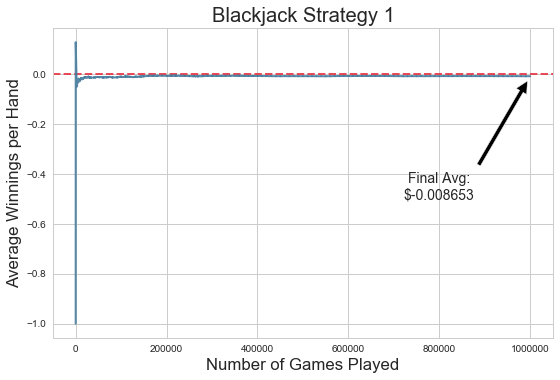

In [140]:
# initialize deck
deck = []

# initialize winnings and winnings list
winnings = 0.0
winnings_list = []

# initialize game counter
games = 0
games_list = []

# simulate games
for i in range(1000000):
    deck, winnings, games = play_strategy_1(deck, winnings, games)
    winnings_list.append(winnings)
    games_list.append(games)

# create summary table
dfStrategy1 = pd.DataFrame({"games": games_list,
                            "winnings": winnings_list})
dfStrategy1['avg_winnings'] = dfStrategy1['winnings']/dfStrategy1['games']

# graph outcome
graph_outcome(games_list, winnings_list, 'Blackjack Strategy 1')